In [ ]:
% tensorflow_version 2.x

In [ ]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
x_train.shape

(60000, 28, 28, 1)

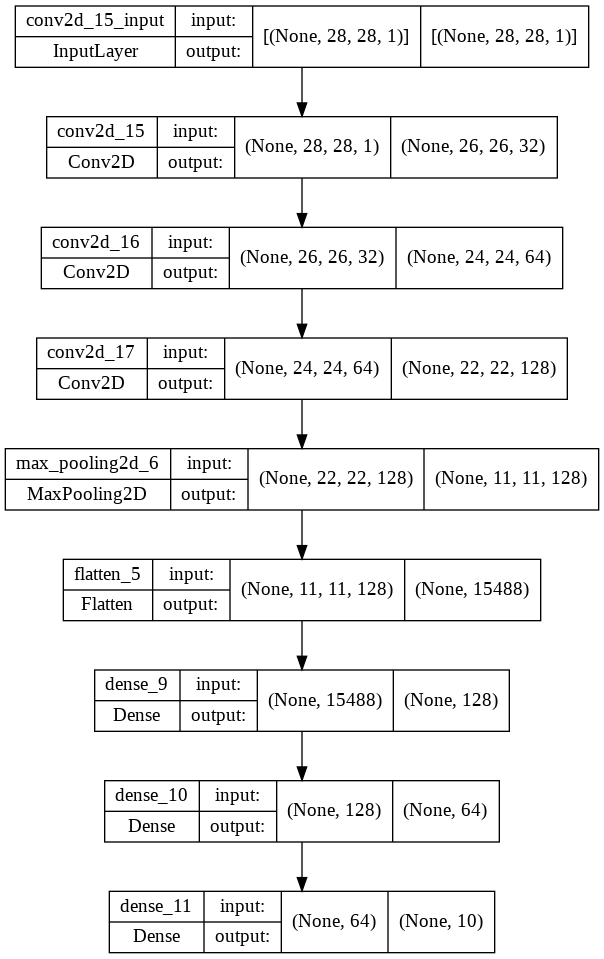

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

CNN=keras.Sequential(name="CNN")
CNN.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
CNN.add(layers.Conv2D(64,(3,3),activation='relu'))
CNN.add(layers.Conv2D(128,(3,3),activation='relu'))
CNN.add(layers.MaxPool2D(2,2))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(128,activation='relu'))
CNN.add(layers.Dense(64,activation='relu'))
CNN.add(layers.Dense(10,activation='softmax'))
keras.utils.plot_model(CNN,show_shapes=True)

In [ ]:
CNN.compile(optimizer='Adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
CNN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 299s 159ms/step - loss: 0.1110 - accuracy: 0.9649
Epoch 2/5
1875/1875 [==============================] - 298s 159ms/step - loss: 0.0399 - accuracy: 0.9879
Epoch 3/5
 259/1875 [===>..........................] - ETA: 4:21 - loss: 0.0255 - accuracy: 0.9913

In [ ]:
import numpy as np
predict_x=CNN.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
count=0
for i in range(len(y_test)):
  if(classes_x[i]!=y_test[i]):
    count+=1

accuracy=1-(count/len(y_test))

In [ ]:
accuracy

0.9889